# ECE6530 DSP Group 3 Project
# Lab P-10: Edge Detection, Exercise 3.1
### Group Members: Grant Brown, Thomas Warren, Rick Lyon

In [1]:
# Load the required libraries
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True, precision=2)
plt.rc("xtick", direction="inout", labelsize="x-small")
plt.rc("ytick", direction="inout", labelsize="x-small")

def stem_plot(
    ax: plt.Axes, xd, yd, color="teal", markersize=6, linestyle="solid", label=None
):
    """Create customized stem plot on axes with data (xd, yd)"""
    markerline, stemlines, baseline = ax.stem(xd, yd, label=label)
    plt.setp(stemlines, color=color, linestyle=linestyle)
    plt.setp(markerline, markersize=markersize, color=color)

%config InlineBackend.figure_formats = ['svg']

# 3.1 Finding Edges: 1-D Filter Cascaded with a Nonlinear Operators

Implement the first difference FIR filter,
$$
y[n] = x[n] - x[n-1]
$$

On the following signal,
```
xn = 255*(rem(1:159,30)>19)
```

The signal is implemented in Python with,
```python
xn = 255 * ((x % 30) > 19)
```

The impulse response $h[n]$ for this FIR filter is,
$$
h[n] = [1, -1]
$$

## (a)
Plot both the input and output waveforms $x[n]$ and $y[n]$. 

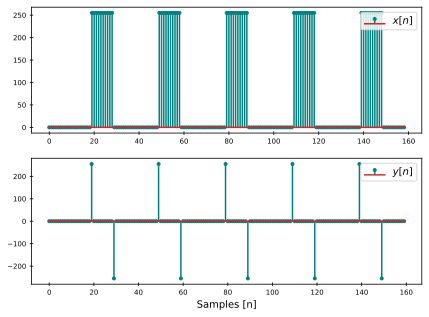

In [2]:
%config InlineBackend.figure_formats = ['svg']

# create xn signal
n = np.arange(1, 160)
xn = 255 * ((n % 30) > 19)

# apply the FIR filter to the input signal using convolution
hn = np.array([1, -1])
yn = np.convolve(xn, hn)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
stem_plot(ax1, np.arange(len(xn)), xn, markersize=3)
stem_plot(ax2, np.arange(len(yn)), yn, markersize=3)
ax1.legend(["$x[n]$"], loc="upper right")
ax2.legend(["$y[n]$"], loc="upper right")
ax2.set_xlabel("Samples [n]");

## (b)
The output $y[n]$ is simply the difference of the current sample $n$ with the previous sample value at $n-1$. When the input $x[n]$ is constant between the current and last sample, the output is zero, but is non-zero when an edge occurs. The value of $y[n]$ at the edges is the difference in the two sample values, so it has a value of 255 when the input transitions from 0 to 255 (positive edge), and -255 when the input transitions from 255 back to 0 (negative edge).

## (c)

The length of $y[n]$ is related to the length of the input at the filter impulse response using the convolution property,

$$
\mathrm{len}(y[n]) = \mathrm{len}(x[n])+ \mathrm{len}({h[n]}) -1 
$$

In [3]:
print("XN:{} HN: {}, YN: {}".format(len(xn), len(hn), len(yn)))

XN:159 HN: 2, YN: 160


## (d)

Determine an appropriate value of the threshold $\tau$ to get the edges of the input. 

$$ d[n] = 
\begin{cases}
\mathrm{Edge \ True} & \mathrm{if \ } |y[n]|  > \tau \\
\mathrm{Edge \ False} & \mathrm{if \ } |y[n]| < \tau
\end{cases}
$$

For this signal, an appropriate threshold is half of the maximum value of $x[n]$ or 255.
$$ \tau = \mathrm{max}(x[n]) /2 $$

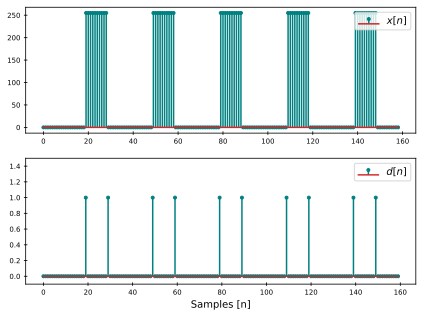

In [4]:
# normalized edge detector. A transition is considered an edge if the differnce is half the maximum value of xn
tau = 255 / 2
edges_n = np.where(np.abs(yn) > tau, 1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
stem_plot(ax1, np.arange(len(xn)), xn, markersize=3)
stem_plot(ax2, np.arange(len(edges_n)), edges_n, markersize=3)
ax2.set_ylim([-0.1, 1.5])
ax1.legend(["$x[n]$"], loc="upper right")
ax2.legend(["$d[n]$"], loc="upper right")
ax2.set_xlabel("Samples [n]");

## (e)

Produce a shorter signal that contains the edge locations. Determine the length of this signal and plot it.

The length of this signal is 10 samples since there are 10 edges in the input signal.

Length of edge signal: 10


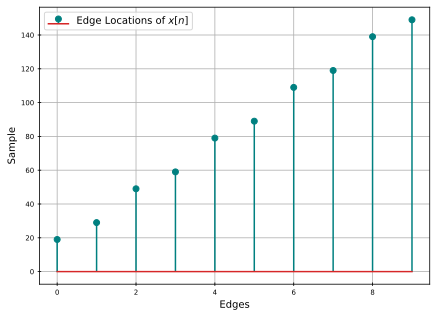

In [5]:
# nonzero returns the indices of the non-zero values, and the non-zero values. We only care
# about the indices, which we name edges_samples.
edges_samples = np.nonzero(edges_n)[0]

fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
stem_plot(ax1, np.arange(len(edges_samples)), edges_samples)
ax1.grid(True)
ax1.set_ylabel("Sample")
ax1.set_xlabel("Edges")
ax1.legend(["Edge Locations of $x[n]$"], loc="upper left")
print(f"Length of edge signal: {len(edges_samples)}")

In [6]:
from IPython.display import display, HTML
from ipylab import JupyterFrontEnd
import subprocess

app = JupyterFrontEnd()

display(
    HTML(
        "<style>"
        ".jp-Cell { overflow-x: visible; overflow: visible; "
        "width: 95%; max-width: 960px; "
        "margin-left: auto; margin-right: auto; }"
        "img {"
        "width: 90%;"
        "height: 100%;}"
        ".jp-Cell-inputWrapper { width: 95%; overflow-x: visible; overflow: visible;}"
        "</style>"
    )
)

app.commands.execute("docmanager:save")
subprocess.run("jupyter nbconvert --to html main.ipynb", shell=True)
app.commands.execute("docmanager:save");